In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# np.set_printoptions(suppress= True, precision=2)

In [76]:
USAhousing = pd.read_csv('USA_Housing.csv')
# USAhousing = USAhousing.drop('Address',axis = 1).round(2).head()
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [39]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5 non-null      float64
 1   Avg. Area House Age           5 non-null      float64
 2   Avg. Area Number of Rooms     5 non-null      float64
 3   Avg. Area Number of Bedrooms  5 non-null      float64
 4   Area Population               5 non-null      float64
 5   Price                         5 non-null      float64
dtypes: float64(6)
memory usage: 368.0 bytes


In [41]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,68681.722000,5.956000,7.136000,3.960000,32161.276000,1.103095e+06
std,9855.470064,0.782196,1.112915,0.822435,7196.577776,3.216642e+05
min,59982.200000,5.040000,5.590000,3.090000,23086.800000,6.309435e+05
25%,61287.070000,5.680000,6.730000,3.260000,26354.110000,1.058988e+06
50%,63345.240000,5.870000,7.010000,4.090000,34310.240000,1.059034e+06
75%,79248.640000,6.000000,7.840000,4.230000,36882.160000,1.260617e+06
max,79545.460000,7.190000,8.510000,5.130000,40173.070000,1.505891e+06


In [15]:
# upper cap outlier - big values == q3+(1.5*IQR) < bigger outlier
# lower cap outliers - lower values == q1-(1.5*IQR) > lower outlier  
# IQR - Inter Quartile Range - Q3-Q1   (75%-25%)


In [43]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [25]:
USAhousing.shape

(5000, 7)

In [51]:
# sns.pairplot(USAhousing)

In [78]:
 # upper cap outlier - big values == q3+(1.5*IQR) < bigger outlier
# lower cap outliers - lower values == q1-(1.5*IQR) > lower outlier  
# IQR - Inter Quartile Range - Q3-Q1   (75%-25%)

# def del_outlier(col_name,data):
#     for i in col_name:
#         fig = plt.figure(figsize=(8,8))
#         sns.boxplot(x = data[col_name])
#         plt.show()
        
#         q1 = data[col_name].quantile(0.25)
#         q2 = data[col_name].quantile(0.50)
#         q3 = data[col_name].quantile(0.75)
#         iqr = q3-q1
#         lower_cap = q1-(1.5*iqr)
#         upper_cap = q3+(1.5*iqr)
#         data[column_name] = np.where(data[column_name]  > max_val, q2, data[column_name] )
#         data[column_name] = np.where(data[column_name]  < min_val, q2, data[column_name] )  
#     return data  
# new_data =  del_outlier(USAhousing.drop(['Price','Address'], axis=1).columns, USAhousing)
#         data[column_name] = data[column_name].apply(lambda x: q2 if ((x < lower_cap)|( x > upper_cap)) else data[column_name])
#     return data

 
# new_data =  del_outlier(USAhousing.columns, USAhousing)

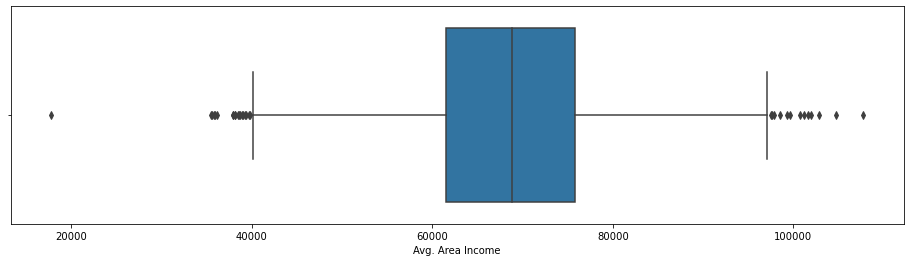

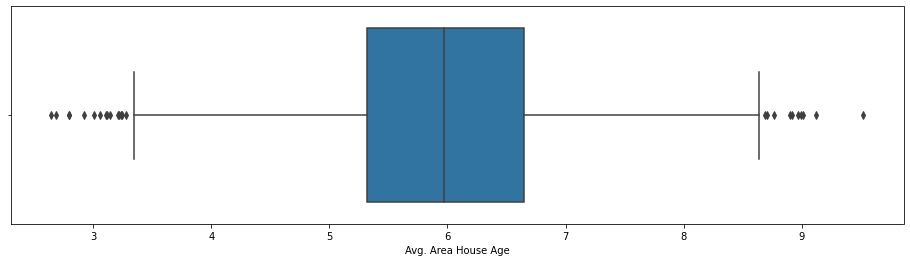

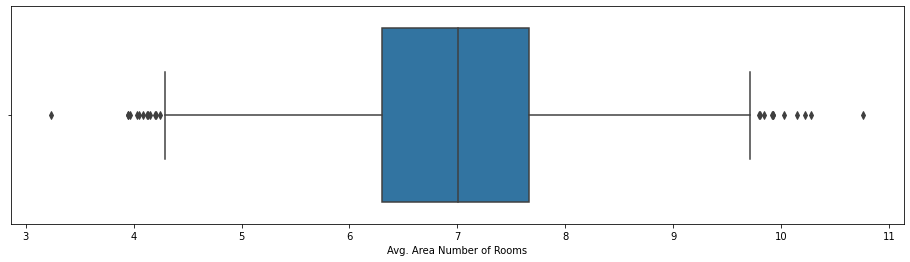

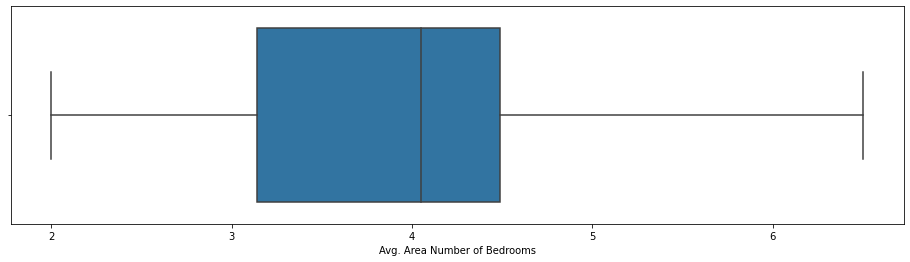

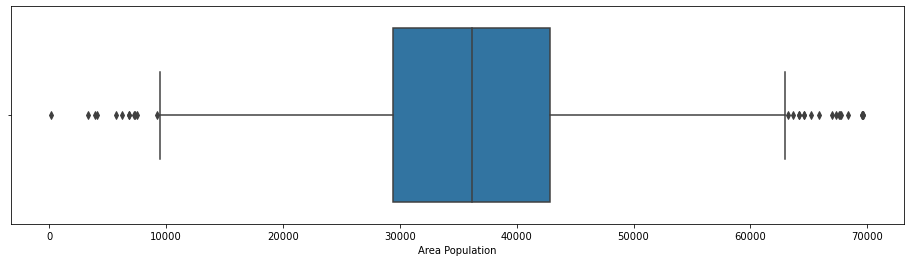

In [79]:
def del_outlier(columns, data):
  for column_name in columns:
    fig=plt.figure(figsize=(16,4))
    sns.boxplot(x = data[column_name])
    plt.show()
    
    q1 = data[column_name].quantile(0.25)
    q2 = data[column_name].quantile(0.50)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    data[column_name] = np.where(data[column_name]  > max_val, q2, data[column_name] )
    data[column_name] = np.where(data[column_name]  < min_val, q2, data[column_name] )  
  return data  
new_data =  del_outlier(USAhousing.drop(['Price','Address'], axis=1).columns, USAhousing)